In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ordered_set import OrderedSet

In [164]:
df = pd.read_csv("Iris.csv")
df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [165]:
feature_list = list(df.columns)
print(feature_list)
feature_list.remove('Id')
target = 'Species'
df = df[feature_list]


['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [166]:
target_set = OrderedSet(df[target])
print(f"number of features: {len(feature_list)}")
print(f"target set: {target_set}")
print(f"len target set: {len(target_set)}")
print(f"df shape: {df.shape}")
print(f"nan percent : {df.isna().sum().sum()/(df.size)}")
print(df[target].value_counts())

number of features: 5
target set: OrderedSet(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
len target set: 3
df shape: (150, 5)
nan percent : 0.0
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


<Axes: >

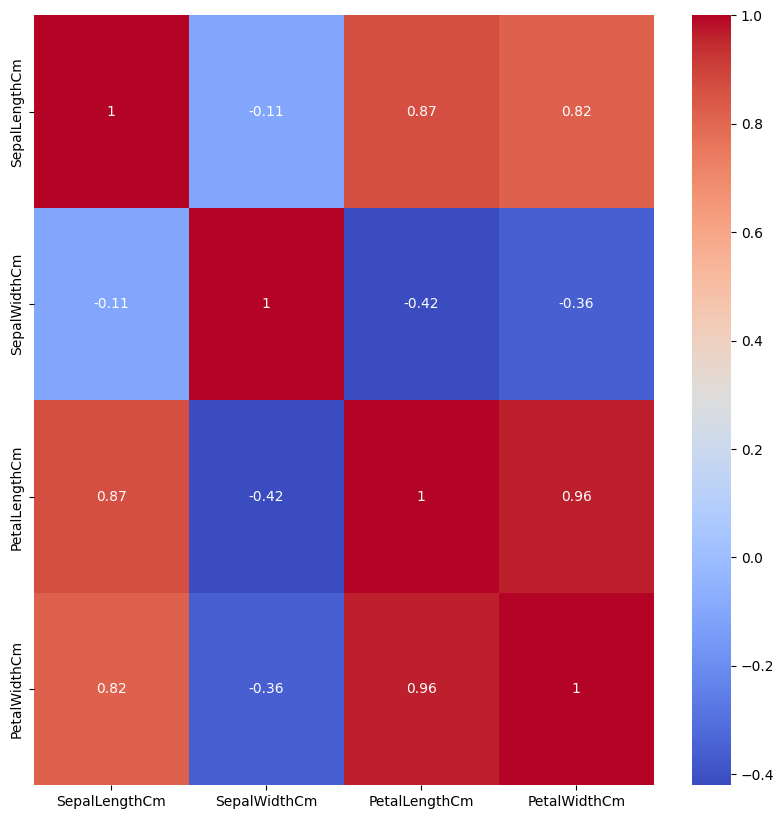

In [167]:
corr = df[feature_list].corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, ax=ax)

In [168]:
target_num = target+"Num"
df[target_num] = pd.factorize(df[target])[0] + 1
features = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']

df_filtered = df

In [169]:
df_filtered

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species  \
0              5.1           3.5            1.4           0.2     Iris-setosa   
1              4.9           3.0            1.4           0.2     Iris-setosa   
2              4.7           3.2            1.3           0.2     Iris-setosa   
3              4.6           3.1            1.5           0.2     Iris-setosa   
4              5.0           3.6            1.4           0.2     Iris-setosa   
..             ...           ...            ...           ...             ...   
145            6.7           3.0            5.2           2.3  Iris-virginica   
146            6.3           2.5            5.0           1.9  Iris-virginica   
147            6.5           3.0            5.2           2.0  Iris-virginica   
148            6.2           3.4            5.4           2.3  Iris-virginica   
149            5.9           3.0            5.1           1.8  Iris-virginica   

     SpeciesNum  
0             1  
1             1  
2             1  
3             1  
4             1  
..          ...  
145           3  
146           3  
147           3  
148           3  
149           3  

[150 rows x 6 columns]

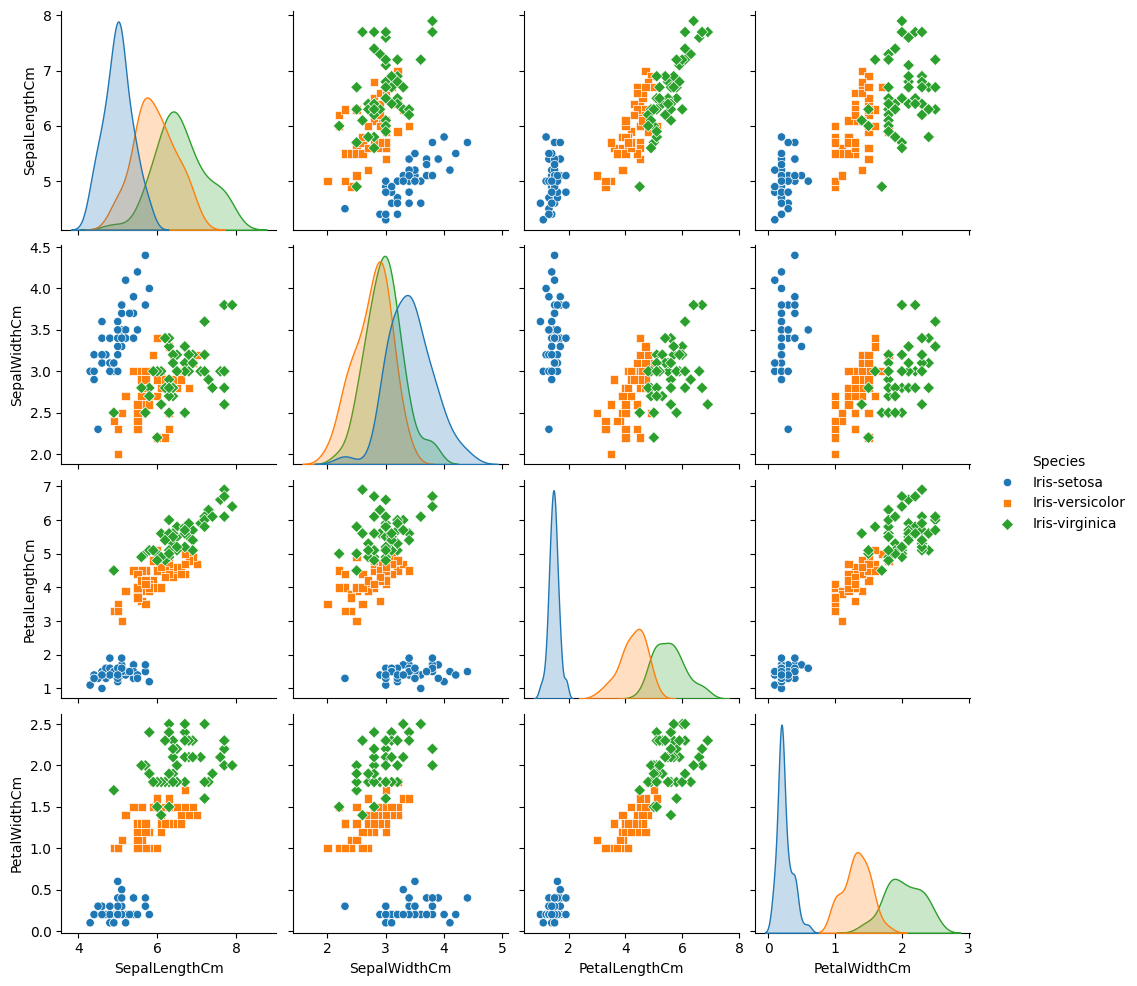

In [170]:
sns.pairplot(df_filtered,
             vars=features,
             hue=target,
             diag_kind='kde',
             markers=['o', 's', 'D']
)

plt.show()

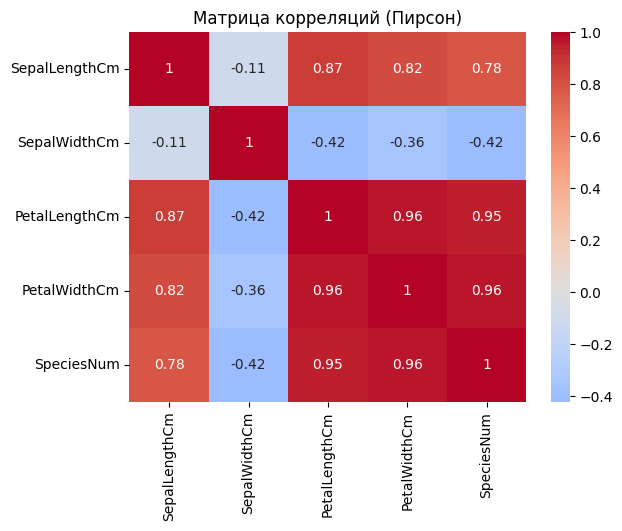

In [171]:
 
sns.heatmap(df_filtered.corr(method='pearson', numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title(f'Матрица корреляций (Пирсон)')
plt.show()

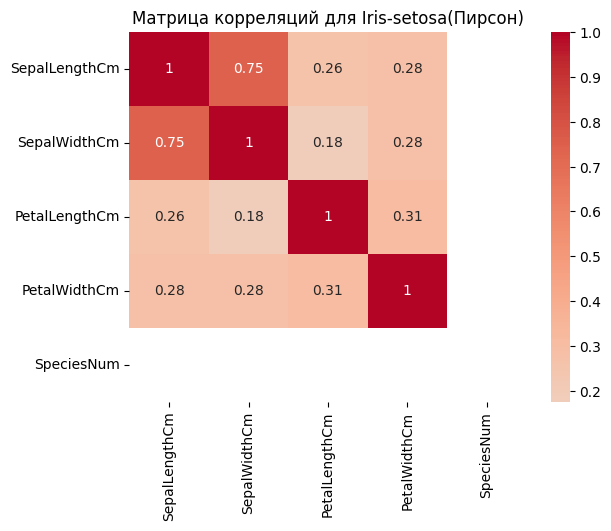

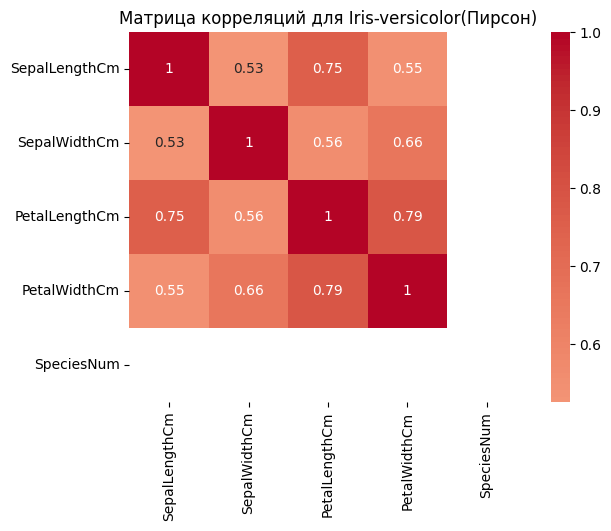

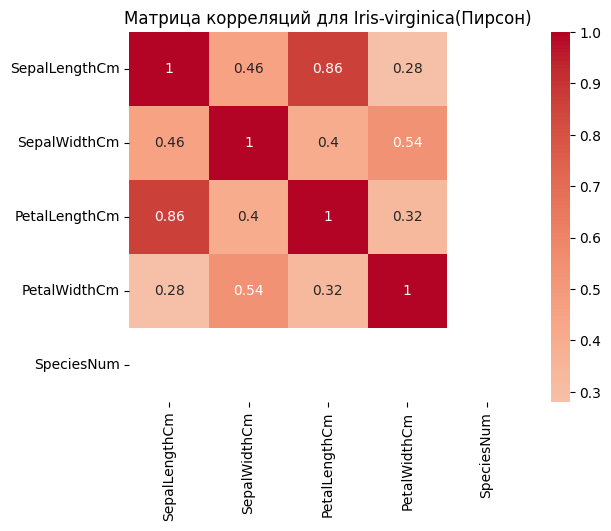

In [172]:

for quality_rate, group in df_filtered.groupby(target):
    corr = group.corr(method='pearson', numeric_only=True)
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Матрица корреляций для {quality_rate}(Пирсон)')
    plt.show()

    

In [173]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [174]:
import matplotlib as mpl
from matplotlib import colors

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

def plot_ellipse(mean, cov, color, ax):
    v, w = np.linalg.eigh(cov)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.4)
    ax.add_artist(ell)


def plot_result(estimator, X, y, ax):
    cmap = colors.ListedColormap(["tab:red", "tab:blue"])
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="auto",
        plot_method="pcolormesh",
        ax=ax,
        cmap="RdBu",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        estimator,
        X,
        response_method="auto",
        plot_method="contour",
        ax=ax,
        alpha=1.0,
        levels=[0.5],
    )
    y_pred = estimator.predict(X)
    X_right, y_right = X[y == y_pred], y[y == y_pred]
    X_wrong, y_wrong = X[y != y_pred], y[y != y_pred]
    ax.scatter(X_right[:, 0], X_right[:, 1], c=y_right, s=20, cmap=cmap, alpha=0.5)
    ax.scatter(
        X_wrong[:, 0],
        X_wrong[:, 1],
        c=y_wrong,
        s=30,
        cmap=cmap,
        alpha=0.9,
        marker="x",
    )
    ax.scatter(
        estimator.means_[:, 0],
        estimator.means_[:, 1],
        c="yellow",
        s=200,
        marker="*",
        edgecolor="black",
    )

    if isinstance(estimator, LinearDiscriminantAnalysis):
        covariance = [estimator.covariance_] * 2
    else:
        covariance = estimator.covariance_
    plot_ellipse(estimator.means_[0], covariance[0], "tab:red", ax)
    plot_ellipse(estimator.means_[1], covariance[1], "tab:blue", ax)

    ax.set_box_aspect(1)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set(xticks=[], yticks=[])

In [175]:
df_two_classes = df_filtered[df_filtered[target_num].isin([2,3])]

X = df_two_classes[features].to_numpy()
Y = df_two_classes[target_num].to_numpy()

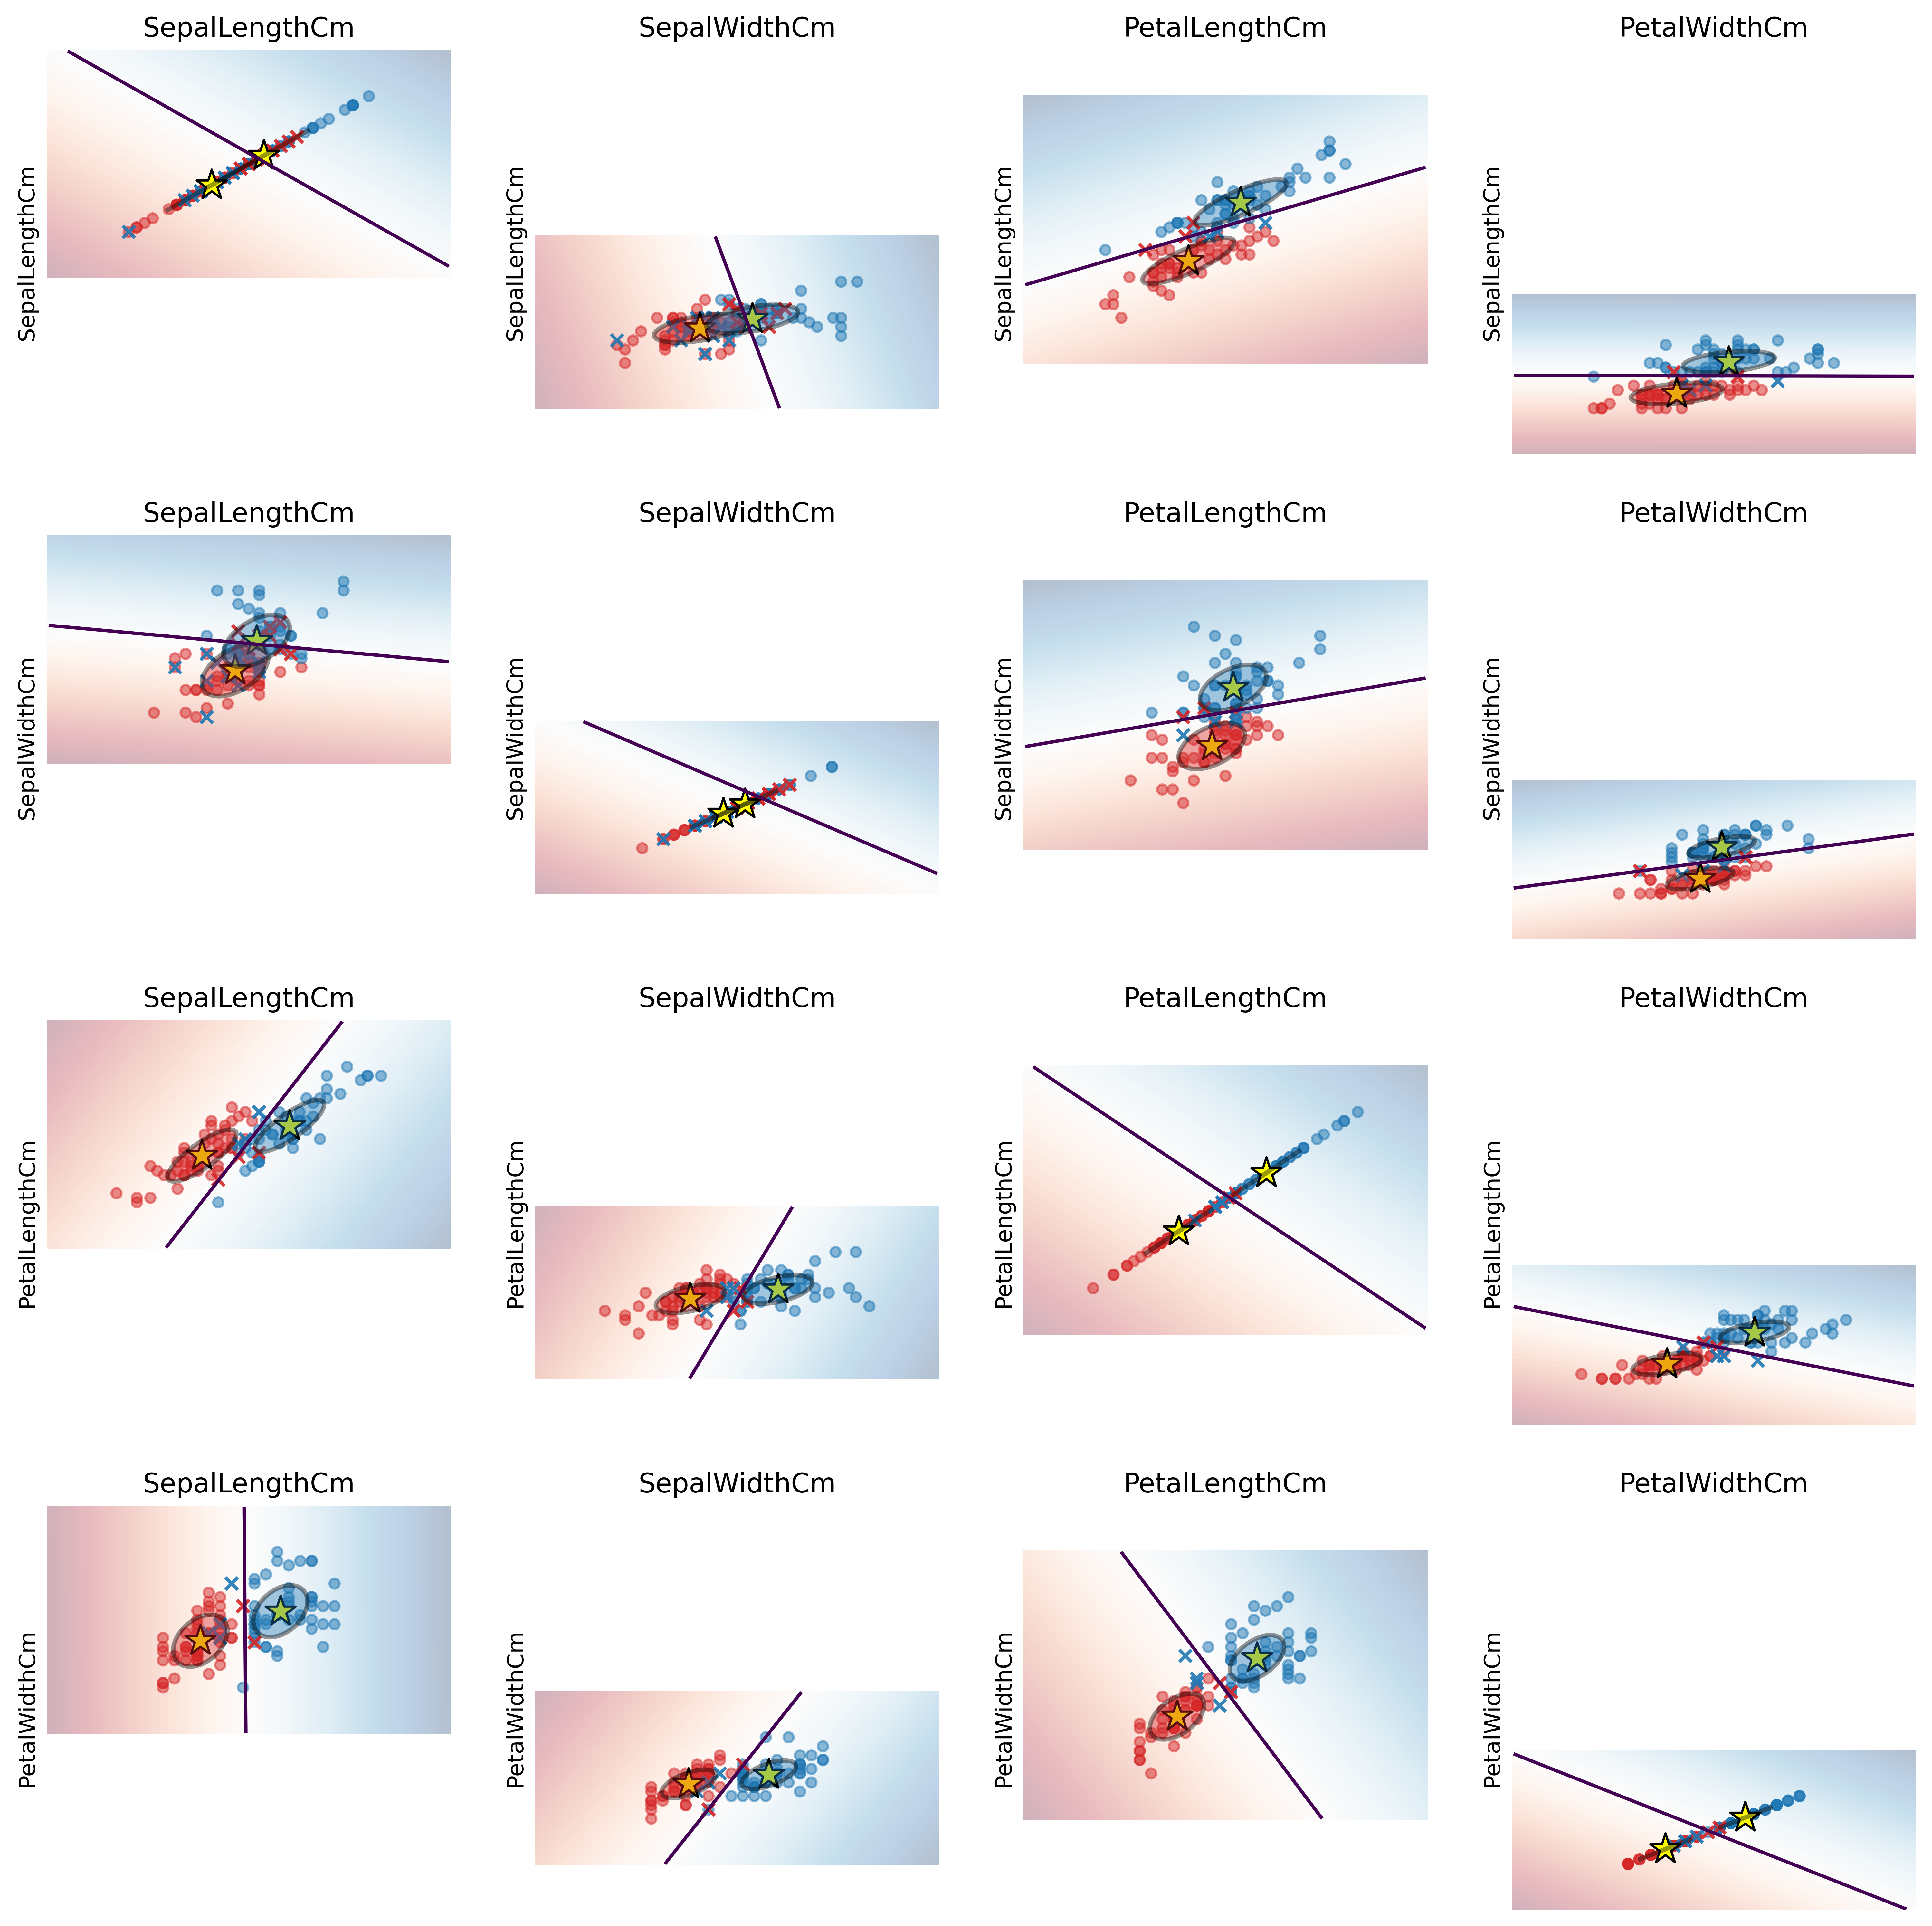

In [176]:
fig, axs = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex="row", sharey="row", dpi=500, figsize=(15, 15))
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        X_pair = X[:, [i, j]]
        lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)        
        lda.fit(X_pair, Y)
        plot_result(lda, X_pair, Y, axs[i][j])
        axs[i][j].set_ylabel(df_two_classes.columns[i])
        axs[i][j].set_title(df_two_classes.columns[j])




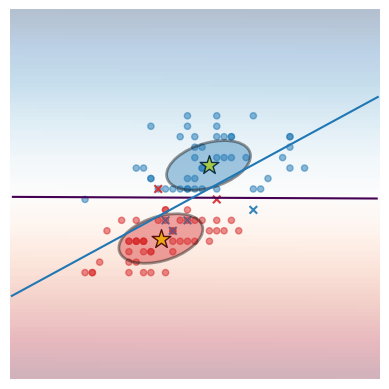

In [177]:
from sklearn import linear_model

two_features = ['SepalLengthCm', 'PetalWidthCm']
X_pair = df_two_classes[two_features].to_numpy()
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)        
lda.fit(X_pair, Y)
fig, ax = plt.subplots()
plot_result(lda, X_pair, Y, ax)


linear = linear_model.LinearRegression()
x_reg, y_reg = df_two_classes[two_features[0]].to_numpy().reshape(-1, 1), df_two_classes[two_features[1]].to_numpy()
linear.fit(x_reg, y_reg)
x_min, x_max = x_reg.min() - 1, x_reg.max() + 1
reg_line_x = np.linspace(x_min, x_max, 100).reshape(-1, 1)
reg_line_y = linear.predict(reg_line_x)
plt.plot(reg_line_x, reg_line_y)

/Users/antonadonin/PycharmProjects/StatisticTheory/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/Users/antonadonin/PycharmProjects/StatisticTheory/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/antonadonin/PycharmProjects/StatisticTheory/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/antonadonin/PycharmProjects/StatisticTheory/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


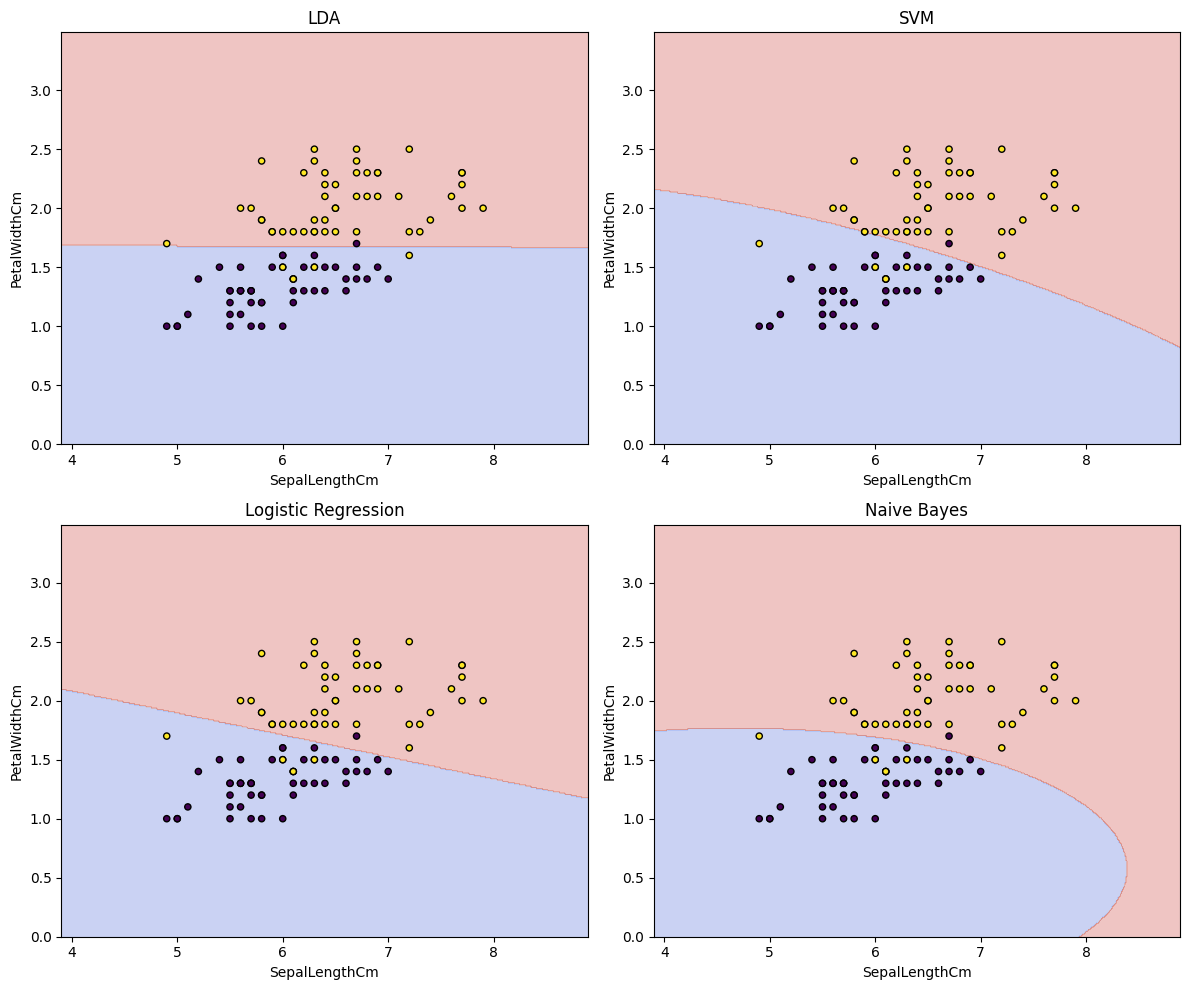

In [178]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


models = {
    'LDA': LinearDiscriminantAnalysis(),
    'SVM': SVC(probability=True),
    'Logistic Regression': linear_model.LogisticRegression(),
    'Naive Bayes': GaussianNB()
}

X = df_two_classes[two_features]
Y = df_two_classes[target_num]

def plot_decision_boundary(model, X, y_encoded, ax, model_name):
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_encoded, edgecolor='k', s=20)
    ax.set_xlabel(two_features[0])
    ax.set_ylabel(two_features[1])
    ax.set_title(model_name)
    
for model_name, model in models.items():
    model.fit(X, Y)
    
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for ax, (model_name, model) in zip(axs.ravel(), models.items()):
    plot_decision_boundary(model, X, Y, ax, model_name)

plt.tight_layout()
plt.show()

precision: 0.9583333333333334
recall: 0.92
sensitivity: 0.92
specificity: 0.96


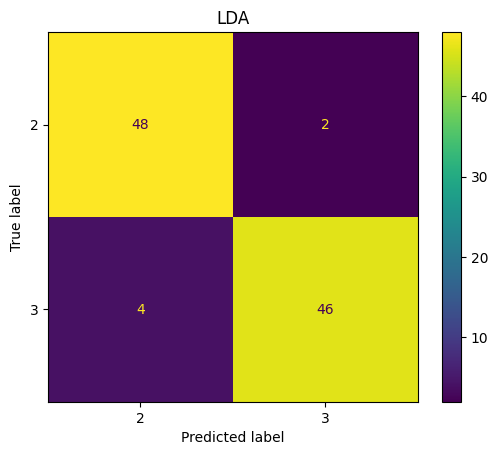

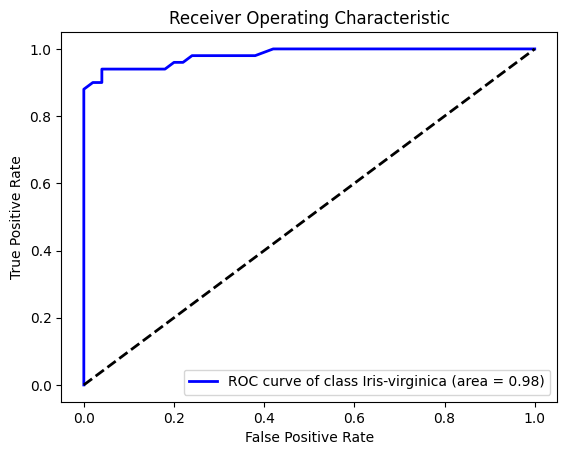

precision: 0.9583333333333334
recall: 0.92
sensitivity: 0.92
specificity: 0.96


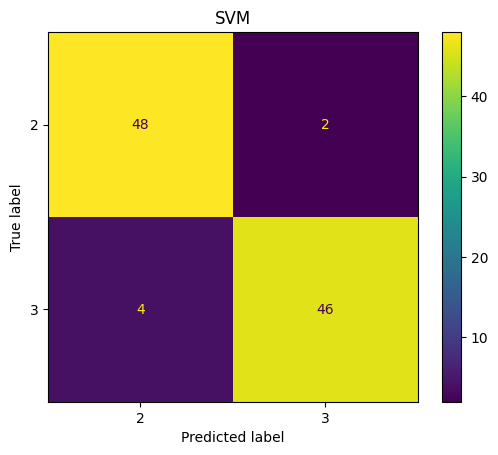

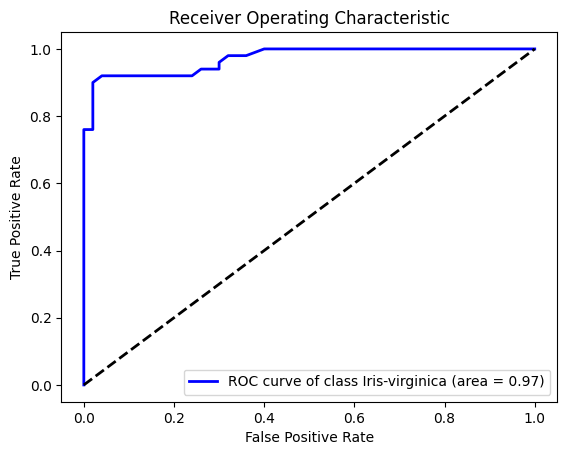

precision: 0.9583333333333334
recall: 0.92
sensitivity: 0.92
specificity: 0.96


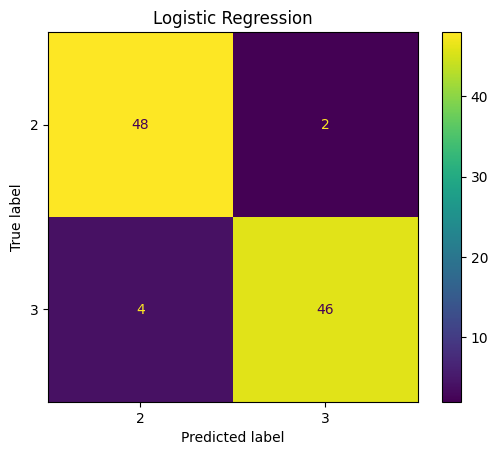

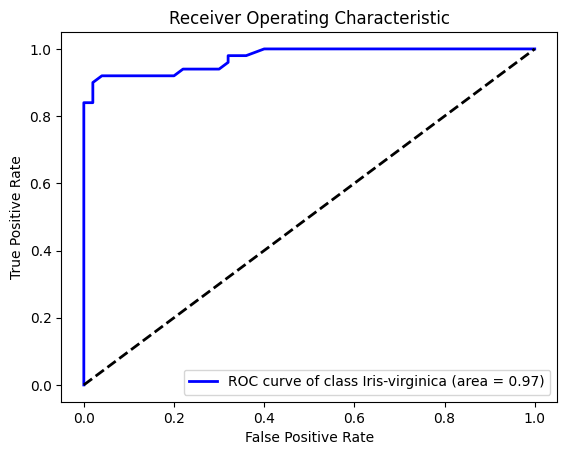

precision: 0.9583333333333334
recall: 0.92
sensitivity: 0.92
specificity: 0.96


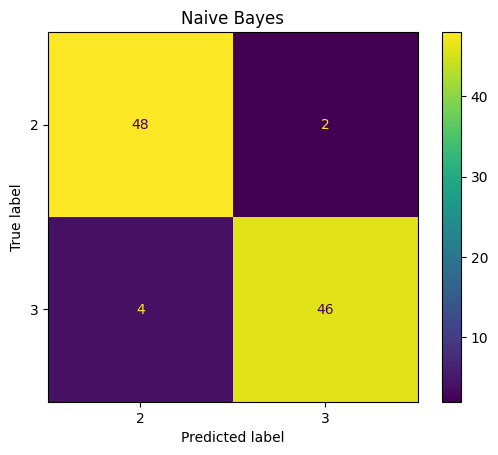

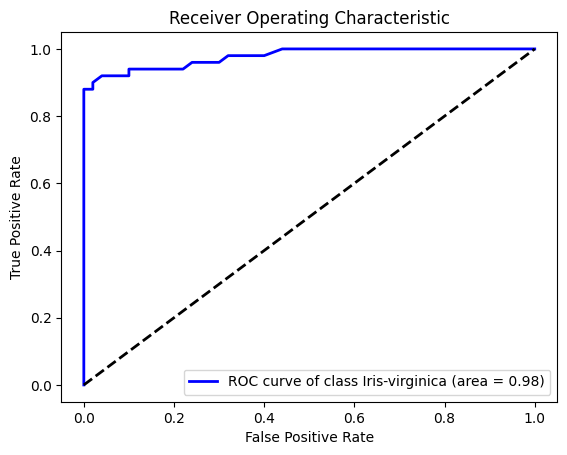

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc

from sklearn.metrics import RocCurveDisplay

target_num = 3
target_name = target_set[target_num - 1]

# Y = Y.to_numpy()
for model_name, model in models.items():
    y_pred = model.predict(X)
    cm = confusion_matrix(Y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=model.classes_)
    disp.plot()
    disp.ax_.set_title(model_name)

    tn, fp, fn, tp = cm.ravel()
    recall = (sensitivity := tp / (tp+fn))
    specificity = tn / (tn+fp)
    precision = tp / (tp + fp)
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"sensitivity: {sensitivity}")
    print(f"specificity: {specificity}")
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y, y_score, pos_label=target_num)
    roc_auc = auc(fpr, tpr)
#     print(fpr)
#     print(tpr)
#     print(thresholds)
#     print(Y)
#     print(y_pred)
#     print(y_score)
    plt.show()

    plt.plot(fpr, tpr, color='blue', lw=2,
            label=f'ROC curve of class {target_name} (area = {roc_auc:0.2f})')

    # Add diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    